# Feature selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.pandas.set_option('display.max_columns',None)
data1 = pd.read_csv('playstore-data1.csv.gz',compression='gzip')
data1

,Unnamed: 0,Category,Min_Downloads,Free,Min_Version,Content,Ad_Support,Inapp_Purchase,Price,Size,Released_Before,Updated_Before,Average_Downloads
0,0,Tools,5000,True,5.0,Everyone,True,False,0.296365,0.190055,0.390706,0.074858,0.567183
1,1,Productivity,50,True,4.0,Everyone,False,False,0.296365,0.233542,0.516485,0.551717,0.258475
2,2,Communication,10,True,4.0,Everyone,True,False,0.296365,0.104922,0.619254,0.639270,0.171003
3,3,Tools,100,True,4.1,Everyone,False,False,0.296365,0.325689,0.423901,0.631728,0.367168
4,4,Social,50,True,6.0,Teen,False,True,0.296365,0.683427,0.586059,0.506348,0.274358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898101,1898101,Education,5,True,4.4,Everyone,False,False,0.296365,0.336849,0.453595,0.493652,0.116101
1898102,1898102,Education,1000,True,4.1,Everyone,True,False,0.296365,0.411020,0.641813,0.623960,0.473443
1898103,1898103,Education,100,True,4.1,Everyone,False,False,0.296365,0.675493,0.675810,0.692836,0.361551
1898104,1898104,Education,100,True,5.0,Everyone,False,False,0.296365,0.601075,0.626976,0.653730,0.325106


In [4]:
data1.drop(['Unnamed: 0','Min_Downloads'],1,inplace=True)
data1.head()

,Category,Free,Min_Version,Content,Ad_Support,Inapp_Purchase,Price,Size,Released_Before,Updated_Before,Average_Downloads
0,Tools,True,5.0,Everyone,True,False,0.296365,0.190055,0.390706,0.074858,0.567183
1,Productivity,True,4.0,Everyone,False,False,0.296365,0.233542,0.516485,0.551717,0.258475
2,Communication,True,4.0,Everyone,True,False,0.296365,0.104922,0.619254,0.639270,0.171003
3,Tools,True,4.1,Everyone,False,False,0.296365,0.325689,0.423901,0.631728,0.367168
4,Social,True,6.0,Teen,False,True,0.296365,0.683427,0.586059,0.506348,0.274358


In [5]:
data1 = pd.get_dummies(data1)
data1

,Free,Min_Version,Ad_Support,Inapp_Purchase,Price,Size,Released_Before,Updated_Before,Average_Downloads,Category_Action,Category_Arcade,Category_Books & Reference,Category_Business,Category_Casual,Category_Communication,Category_Education,Category_Entertainment,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_News & Magazines,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Content_Adults,Content_Everyone,Content_Teen
0,True,5.0,True,False,0.296365,0.190055,0.390706,0.074858,0.567183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,True,4.0,False,False,0.296365,0.233542,0.516485,0.551717,0.258475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,True,4.0,True,False,0.296365,0.104922,0.619254,0.639270,0.171003,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,True,4.1,False,False,0.296365,0.325689,0.423901,0.631728,0.367168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,True,6.0,False,True,0.296365,0.683427,0.586059,0.506348,0.274358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898101,True,4.4,False,False,0.296365,0.336849,0.453595,0.493652,0.116101,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1898102,True,4.1,True,False,0.296365,0.411020,0.641813,0.623960,0.473443,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1898103,True,4.1,False,False,0.296365,0.675493,0.675810,0.692836,0.361551,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1898104,True,5.0,False,False,0.296365,0.601075,0.626976,0.653730,0.325106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
y = data1[['Average_Downloads']]
y

,Average_Downloads
0,0.567183
1,0.258475
2,0.171003
3,0.367168
4,0.274358
...,...
1898101,0.116101
1898102,0.473443
1898103,0.361551
1898104,0.325106


In [7]:
X = data1.drop(['Average_Downloads'],axis=1)
X

,Free,Min_Version,Ad_Support,Inapp_Purchase,Price,Size,Released_Before,Updated_Before,Category_Action,Category_Arcade,Category_Books & Reference,Category_Business,Category_Casual,Category_Communication,Category_Education,Category_Entertainment,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_News & Magazines,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Content_Adults,Content_Everyone,Content_Teen
0,True,5.0,True,False,0.296365,0.190055,0.390706,0.074858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,True,4.0,False,False,0.296365,0.233542,0.516485,0.551717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,True,4.0,True,False,0.296365,0.104922,0.619254,0.639270,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,True,4.1,False,False,0.296365,0.325689,0.423901,0.631728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,True,6.0,False,True,0.296365,0.683427,0.586059,0.506348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898101,True,4.4,False,False,0.296365,0.336849,0.453595,0.493652,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1898102,True,4.1,True,False,0.296365,0.411020,0.641813,0.623960,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1898103,True,4.1,False,False,0.296365,0.675493,0.675810,0.692836,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1898104,True,5.0,False,False,0.296365,0.601075,0.626976,0.653730,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Splitting Train test data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1518484, 36) (379622, 36) (1518484, 1) (379622, 1)


## Correlation Matrix

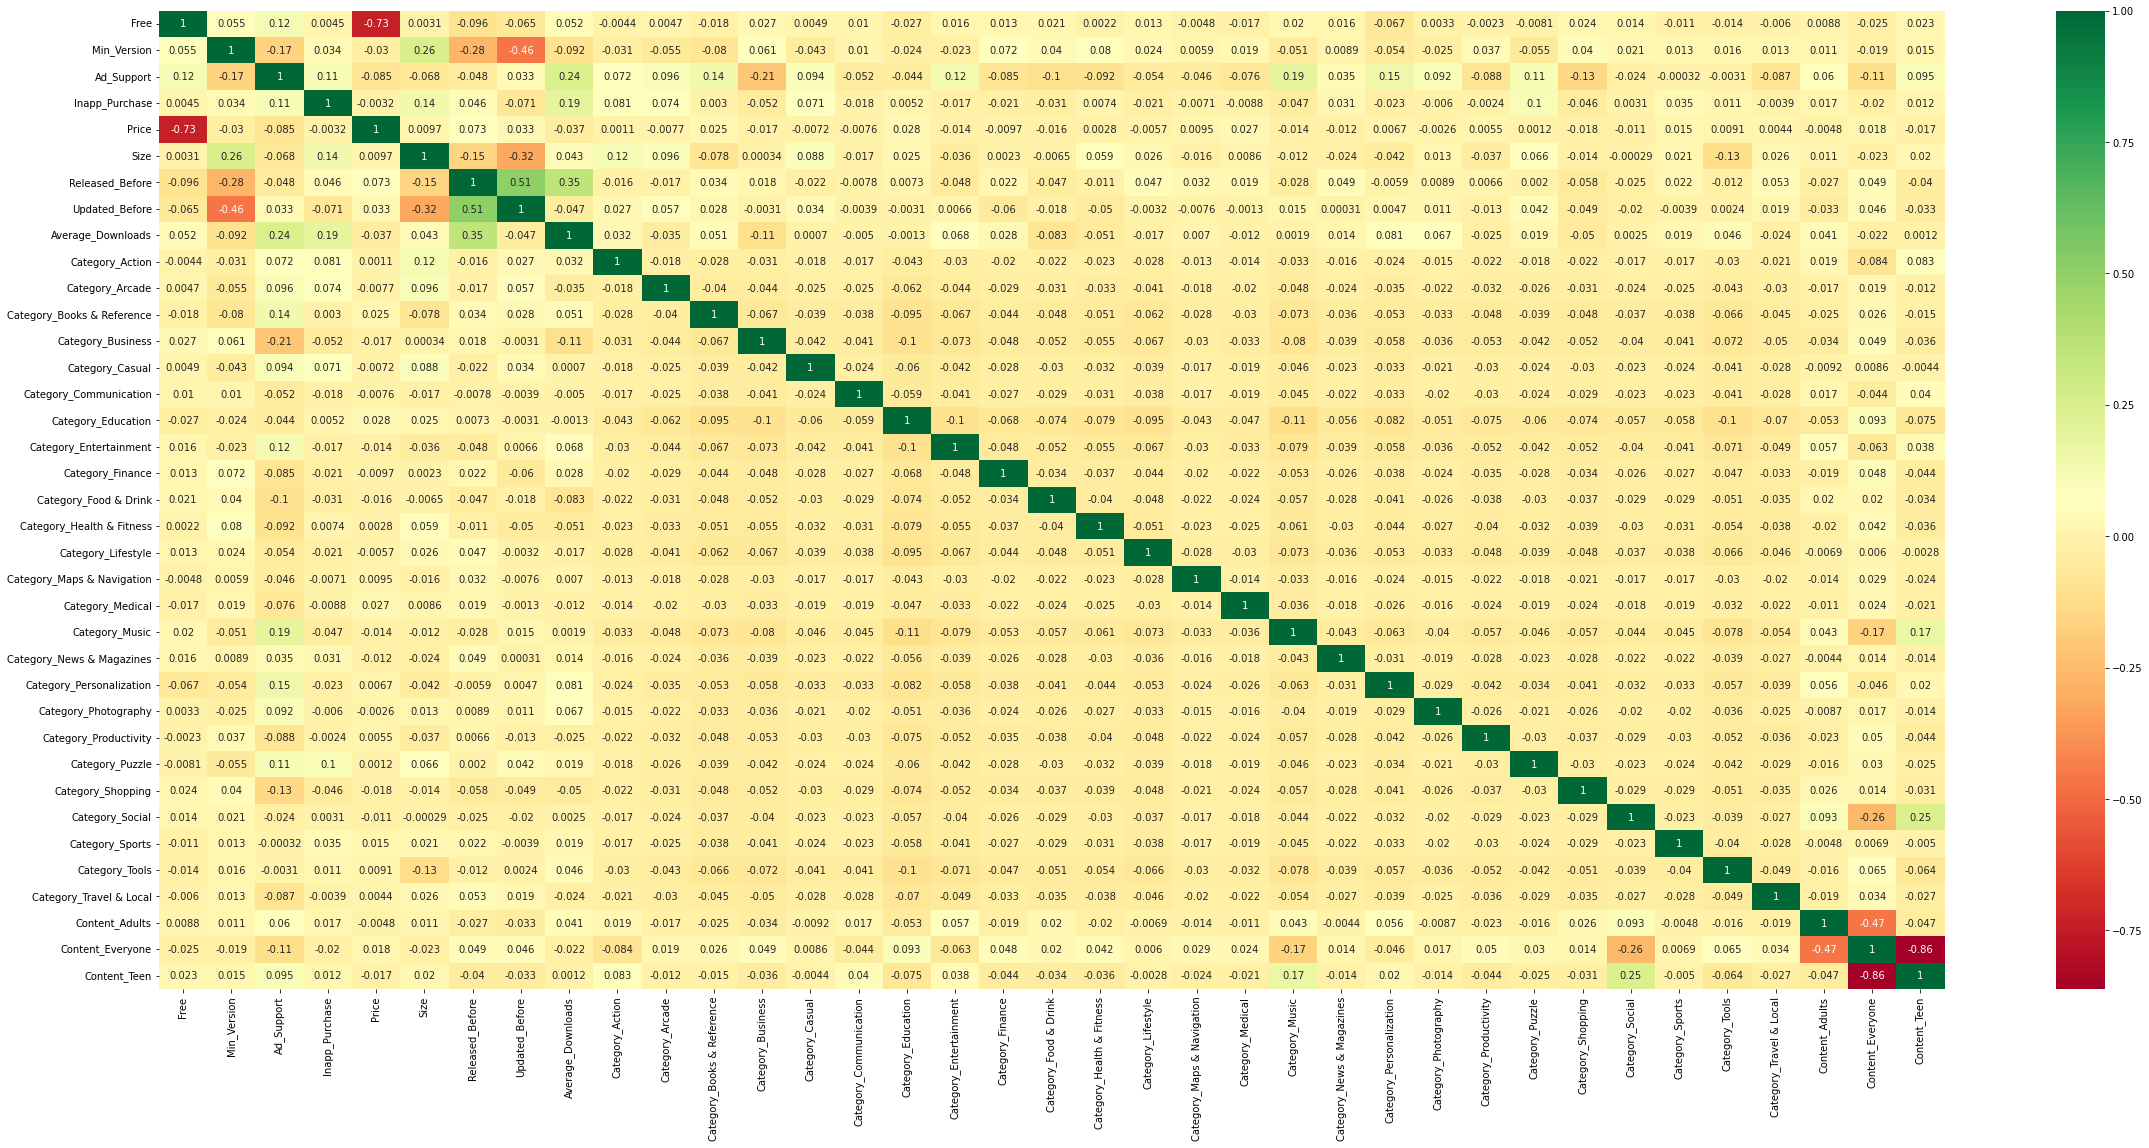

In [9]:
dataset = data1.copy()
Var_Corr = dataset.corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(40,18))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True ,cmap = 'RdYlGn')
plt.show()

## **SELECTED MODELS**
- #### Random forest regressor
    - 0.126
- #### XG boost regressor
    - 0.120
- #### Gradient boosting regessor
    - 0.128
- #### LGBM regressor
    - 0.123
- #### cat boost regressor
    - 0.119

# Feature selection - f_regression

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func= f_regression, k = 28)
fs.fit(X_train,y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
fs

f:\nordic internship\projects\dsbjun21\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SelectKBest(k=28, score_func=<function f_regression at 0x000001D377E89040>)

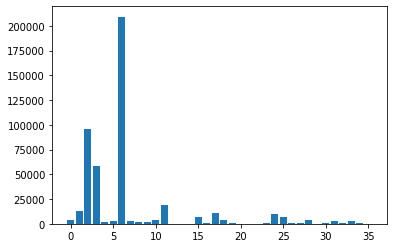

In [21]:
'''for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))'''
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Random forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(X_train_fs, y_train )
predicted_random_forest = forest_model.predict(X_test_fs)
print("Mean Absolute Error using Random Forest: %.3f" % mean_absolute_error(y_test, predicted_random_forest))

<ipython-input-22-4cc2a935964b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train_fs, y_train )


Mean Absolute Error using Random Forest: 0.126


### XG boost

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(X_train_fs, y_train)
predicted_XGBoost = xg_model.predict(X_test_fs)
print("Mean Absolute Error using XGBoost: %.3f" % mean_absolute_error(y_test, predicted_XGBoost))

Mean Absolute Error using XGBoost: 0.121


### Gradient boost

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
GDboost_model = GradientBoostingRegressor()
GDboost_model.fit(X_train_fs, y_train)
predicted_GDboost = GDboost_model.predict(X_test_fs)
print("Mean Absolute Error using GD boost: %.3f" % mean_absolute_error(y_test, predicted_GDboost))

f:\nordic internship\projects\dsbjun21\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error using GD boost: 0.128


### LGBM regressor

In [25]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
LGBM_model = LGBMRegressor()
LGBM_model.fit(X_train_fs, y_train)
predicted_LGBM = LGBM_model.predict(X_test_fs)
print("Mean Absolute Error using LGBM: %.3f" % mean_absolute_error(y_test, predicted_LGBM))

f:\nordic internship\projects\dsbjun21\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error using LGBM: 0.124


### cat boost

In [26]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train_fs, y_train)
predicted_catboost = catboost_model.predict(X_test_fs)
print("Mean Absolute Error using cat boost: %.3f" % mean_absolute_error(y_test, predicted_catboost))

Learning rate set to 0.143778
0:	learn: 0.1884881	total: 273ms	remaining: 4m 33s
1:	learn: 0.1832406	total: 459ms	remaining: 3m 48s
2:	learn: 0.1791353	total: 617ms	remaining: 3m 24s
3:	learn: 0.1762186	total: 795ms	remaining: 3m 18s
4:	learn: 0.1737640	total: 939ms	remaining: 3m 6s
5:	learn: 0.1717677	total: 1.1s	remaining: 3m 2s
6:	learn: 0.1701440	total: 1.25s	remaining: 2m 57s
7:	learn: 0.1688189	total: 1.39s	remaining: 2m 52s
8:	learn: 0.1678138	total: 1.53s	remaining: 2m 48s
9:	learn: 0.1669174	total: 1.68s	remaining: 2m 46s
10:	learn: 0.1661632	total: 1.84s	remaining: 2m 45s
11:	learn: 0.1655073	total: 1.97s	remaining: 2m 42s
12:	learn: 0.1648693	total: 2.13s	remaining: 2m 41s
13:	learn: 0.1643868	total: 2.27s	remaining: 2m 39s
14:	learn: 0.1639347	total: 2.41s	remaining: 2m 38s
15:	learn: 0.1635545	total: 2.57s	remaining: 2m 37s
16:	learn: 0.1631228	total: 2.71s	remaining: 2m 36s
17:	learn: 0.1627779	total: 2.85s	remaining: 2m 35s
18:	learn: 0.1624849	total: 2.99s	remaining: 2m

158:	learn: 0.1538024	total: 24.8s	remaining: 2m 11s
159:	learn: 0.1537929	total: 25s	remaining: 2m 11s
160:	learn: 0.1537790	total: 25.1s	remaining: 2m 10s
161:	learn: 0.1537439	total: 25.3s	remaining: 2m 10s
162:	learn: 0.1537185	total: 25.4s	remaining: 2m 10s
163:	learn: 0.1537009	total: 25.6s	remaining: 2m 10s
164:	learn: 0.1536862	total: 25.7s	remaining: 2m 10s
165:	learn: 0.1536652	total: 25.9s	remaining: 2m 10s
166:	learn: 0.1536443	total: 26.1s	remaining: 2m 9s
167:	learn: 0.1536185	total: 26.2s	remaining: 2m 9s
168:	learn: 0.1536021	total: 26.4s	remaining: 2m 9s
169:	learn: 0.1535818	total: 26.5s	remaining: 2m 9s
170:	learn: 0.1535725	total: 26.6s	remaining: 2m 9s
171:	learn: 0.1535472	total: 26.8s	remaining: 2m 9s
172:	learn: 0.1535340	total: 27s	remaining: 2m 9s
173:	learn: 0.1535163	total: 27.2s	remaining: 2m 9s
174:	learn: 0.1534966	total: 27.4s	remaining: 2m 8s
175:	learn: 0.1534810	total: 27.5s	remaining: 2m 8s
176:	learn: 0.1534692	total: 27.7s	remaining: 2m 8s
177:	lea

316:	learn: 0.1519165	total: 50s	remaining: 1m 47s
317:	learn: 0.1519110	total: 50.1s	remaining: 1m 47s
318:	learn: 0.1519056	total: 50.3s	remaining: 1m 47s
319:	learn: 0.1518990	total: 50.4s	remaining: 1m 47s
320:	learn: 0.1518854	total: 50.5s	remaining: 1m 46s
321:	learn: 0.1518770	total: 50.7s	remaining: 1m 46s
322:	learn: 0.1518678	total: 50.8s	remaining: 1m 46s
323:	learn: 0.1518617	total: 51s	remaining: 1m 46s
324:	learn: 0.1518576	total: 51.1s	remaining: 1m 46s
325:	learn: 0.1518453	total: 51.2s	remaining: 1m 45s
326:	learn: 0.1518363	total: 51.4s	remaining: 1m 45s
327:	learn: 0.1518319	total: 51.5s	remaining: 1m 45s
328:	learn: 0.1518278	total: 51.6s	remaining: 1m 45s
329:	learn: 0.1518164	total: 51.8s	remaining: 1m 45s
330:	learn: 0.1518068	total: 51.9s	remaining: 1m 44s
331:	learn: 0.1518008	total: 52.1s	remaining: 1m 44s
332:	learn: 0.1517922	total: 52.3s	remaining: 1m 44s
333:	learn: 0.1517882	total: 52.4s	remaining: 1m 44s
334:	learn: 0.1517818	total: 52.6s	remaining: 1m 4

471:	learn: 0.1509463	total: 1m 14s	remaining: 1m 22s
472:	learn: 0.1509418	total: 1m 14s	remaining: 1m 22s
473:	learn: 0.1509386	total: 1m 14s	remaining: 1m 22s
474:	learn: 0.1509355	total: 1m 14s	remaining: 1m 22s
475:	learn: 0.1509281	total: 1m 14s	remaining: 1m 22s
476:	learn: 0.1509232	total: 1m 14s	remaining: 1m 22s
477:	learn: 0.1509179	total: 1m 15s	remaining: 1m 21s
478:	learn: 0.1509120	total: 1m 15s	remaining: 1m 21s
479:	learn: 0.1509099	total: 1m 15s	remaining: 1m 21s
480:	learn: 0.1509062	total: 1m 15s	remaining: 1m 21s
481:	learn: 0.1509019	total: 1m 15s	remaining: 1m 21s
482:	learn: 0.1508926	total: 1m 15s	remaining: 1m 21s
483:	learn: 0.1508883	total: 1m 15s	remaining: 1m 21s
484:	learn: 0.1508841	total: 1m 16s	remaining: 1m 20s
485:	learn: 0.1508760	total: 1m 16s	remaining: 1m 20s
486:	learn: 0.1508710	total: 1m 16s	remaining: 1m 20s
487:	learn: 0.1508655	total: 1m 16s	remaining: 1m 20s
488:	learn: 0.1508620	total: 1m 16s	remaining: 1m 20s
489:	learn: 0.1508557	total:

626:	learn: 0.1502805	total: 1m 38s	remaining: 58.4s
627:	learn: 0.1502751	total: 1m 38s	remaining: 58.2s
628:	learn: 0.1502706	total: 1m 38s	remaining: 58s
629:	learn: 0.1502691	total: 1m 38s	remaining: 57.9s
630:	learn: 0.1502656	total: 1m 38s	remaining: 57.7s
631:	learn: 0.1502612	total: 1m 38s	remaining: 57.5s
632:	learn: 0.1502582	total: 1m 38s	remaining: 57.4s
633:	learn: 0.1502546	total: 1m 39s	remaining: 57.2s
634:	learn: 0.1502506	total: 1m 39s	remaining: 57.1s
635:	learn: 0.1502479	total: 1m 39s	remaining: 56.9s
636:	learn: 0.1502413	total: 1m 39s	remaining: 56.8s
637:	learn: 0.1502356	total: 1m 39s	remaining: 56.6s
638:	learn: 0.1502345	total: 1m 39s	remaining: 56.5s
639:	learn: 0.1502319	total: 1m 40s	remaining: 56.3s
640:	learn: 0.1502283	total: 1m 40s	remaining: 56.2s
641:	learn: 0.1502249	total: 1m 40s	remaining: 56s
642:	learn: 0.1502198	total: 1m 40s	remaining: 55.9s
643:	learn: 0.1502135	total: 1m 40s	remaining: 55.8s
644:	learn: 0.1502076	total: 1m 41s	remaining: 55.

782:	learn: 0.1497480	total: 2m 3s	remaining: 34.3s
783:	learn: 0.1497450	total: 2m 3s	remaining: 34.1s
784:	learn: 0.1497427	total: 2m 4s	remaining: 34s
785:	learn: 0.1497373	total: 2m 4s	remaining: 33.8s
786:	learn: 0.1497354	total: 2m 4s	remaining: 33.6s
787:	learn: 0.1497337	total: 2m 4s	remaining: 33.5s
788:	learn: 0.1497320	total: 2m 4s	remaining: 33.3s
789:	learn: 0.1497306	total: 2m 4s	remaining: 33.2s
790:	learn: 0.1497266	total: 2m 4s	remaining: 33s
791:	learn: 0.1497245	total: 2m 5s	remaining: 32.8s
792:	learn: 0.1497216	total: 2m 5s	remaining: 32.7s
793:	learn: 0.1497200	total: 2m 5s	remaining: 32.5s
794:	learn: 0.1497155	total: 2m 5s	remaining: 32.4s
795:	learn: 0.1497127	total: 2m 5s	remaining: 32.2s
796:	learn: 0.1497066	total: 2m 5s	remaining: 32.1s
797:	learn: 0.1497025	total: 2m 5s	remaining: 31.9s
798:	learn: 0.1496994	total: 2m 6s	remaining: 31.7s
799:	learn: 0.1496959	total: 2m 6s	remaining: 31.6s
800:	learn: 0.1496933	total: 2m 6s	remaining: 31.4s
801:	learn: 0.14

938:	learn: 0.1492983	total: 2m 31s	remaining: 9.86s
939:	learn: 0.1492967	total: 2m 31s	remaining: 9.7s
940:	learn: 0.1492922	total: 2m 32s	remaining: 9.54s
941:	learn: 0.1492882	total: 2m 32s	remaining: 9.38s
942:	learn: 0.1492858	total: 2m 32s	remaining: 9.22s
943:	learn: 0.1492822	total: 2m 32s	remaining: 9.06s
944:	learn: 0.1492804	total: 2m 32s	remaining: 8.9s
945:	learn: 0.1492788	total: 2m 33s	remaining: 8.74s
946:	learn: 0.1492764	total: 2m 33s	remaining: 8.58s
947:	learn: 0.1492750	total: 2m 33s	remaining: 8.42s
948:	learn: 0.1492739	total: 2m 33s	remaining: 8.26s
949:	learn: 0.1492717	total: 2m 33s	remaining: 8.1s
950:	learn: 0.1492670	total: 2m 33s	remaining: 7.93s
951:	learn: 0.1492661	total: 2m 34s	remaining: 7.77s
952:	learn: 0.1492642	total: 2m 34s	remaining: 7.61s
953:	learn: 0.1492629	total: 2m 34s	remaining: 7.45s
954:	learn: 0.1492604	total: 2m 34s	remaining: 7.29s
955:	learn: 0.1492574	total: 2m 34s	remaining: 7.13s
956:	learn: 0.1492542	total: 2m 35s	remaining: 6.